In [5]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [6]:
br29 = pd.read_csv("Data/br_29.csv")
br29
br29_norm = pd.read_csv("Data/br_29_norm.csv")
br29_norm
hr29_norm = pd.read_csv("Data/hr_29_norm.csv")
st29_norm = pd.read_csv("Data/st_29_norm.csv")

In [7]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## 29 Day cycles

### interactive plotly Heatmap

In [8]:
#import plotly.plotly as py
import plotly.graph_objs as go

breathrate = br29.columns[1:].astype(str)

date_list = br29.cycle_day.astype(str)

z = br29.drop("cycle_day", axis = 1).values

data = [
    go.Heatmap(
        z=z,
        x=date_list,
        y=breathrate,
        colorscale='Viridis',
    )
]

layout = go.Layout(
    title='29 Day Cycles',
    xaxis = dict(ticks='1', nticks = 31),
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='test-heatmap', show_link = False)

### seaborn heatmaps

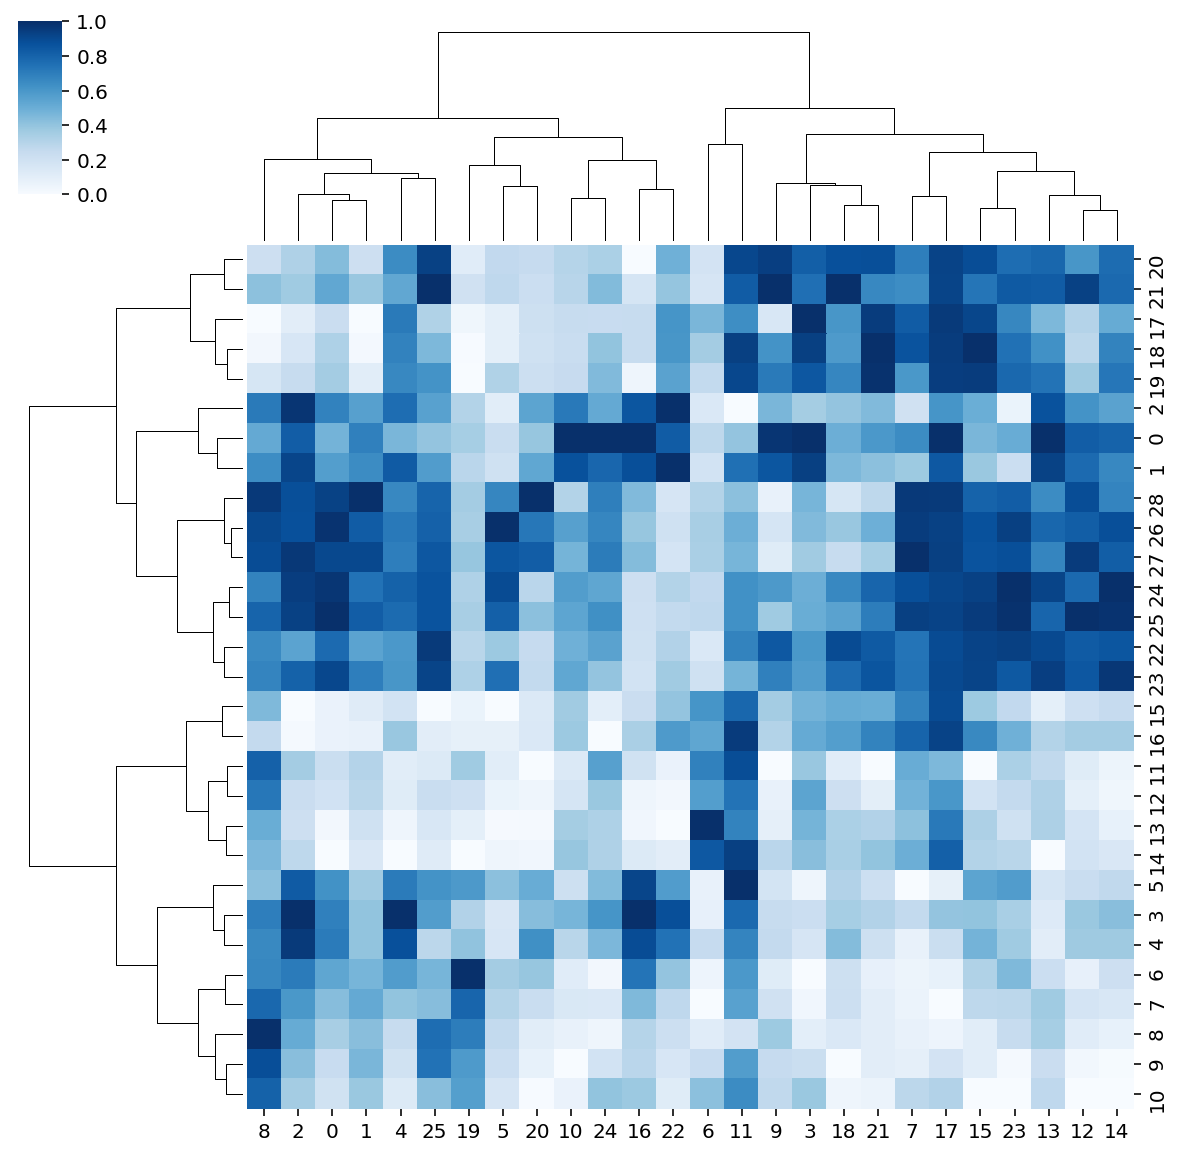

In [9]:
# Prepare a vector of color mapped to the 'cyl' column
#my_palette = dict(zip(df.cyl.unique(), ["orange","yellow","brown"]))
#row_colors = df.cyl.map(my_palette)
 
# with standard scaling
sns.clustermap(z, metric="euclidean", method="ward", cmap="Blues", standard_scale=1)
plt.show()

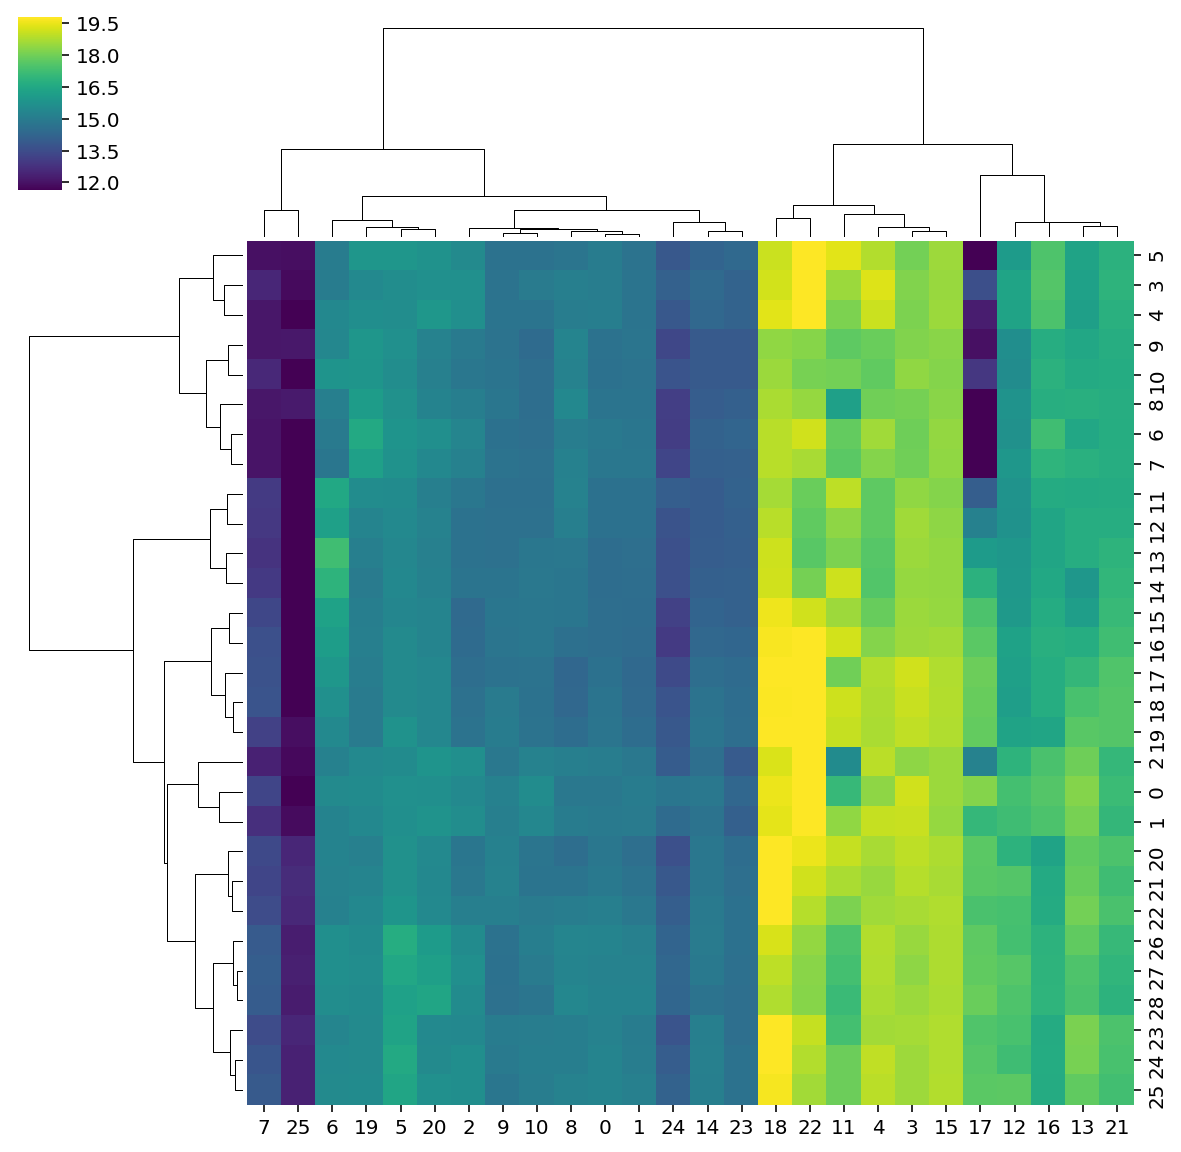

In [10]:
## robust (without taking outliers into account)
sns.clustermap(z, metric="euclidean", method="ward", cmap="viridis", robust = True)
plt.show()

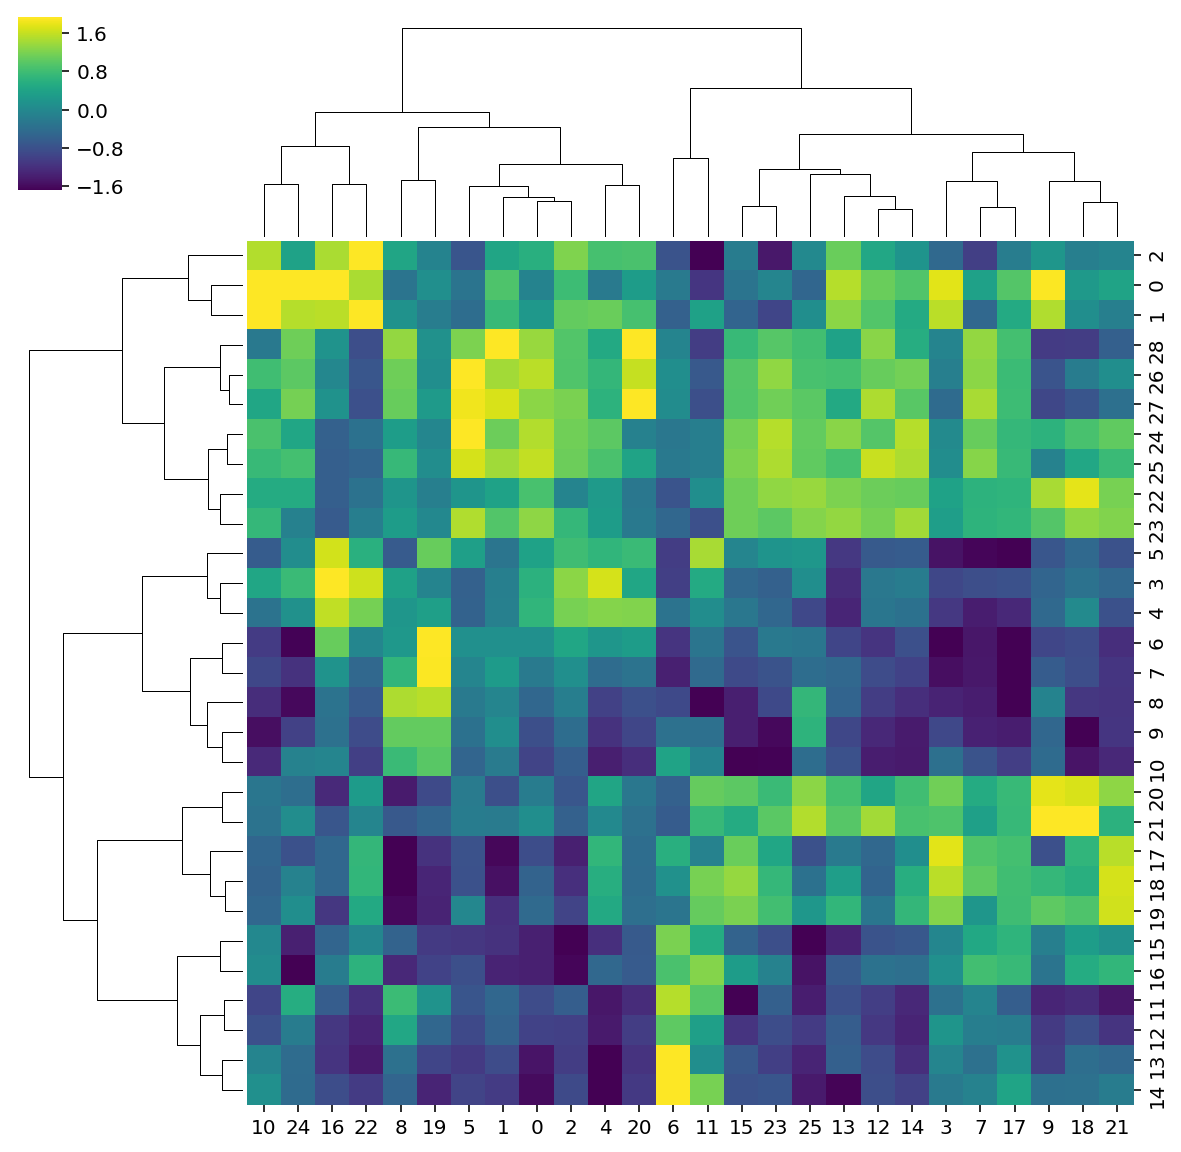

In [11]:
# z-score normalized
sns.clustermap(z, metric="euclidean", method="ward", cmap="viridis", robust = True, z_score = 1)
plt.show()

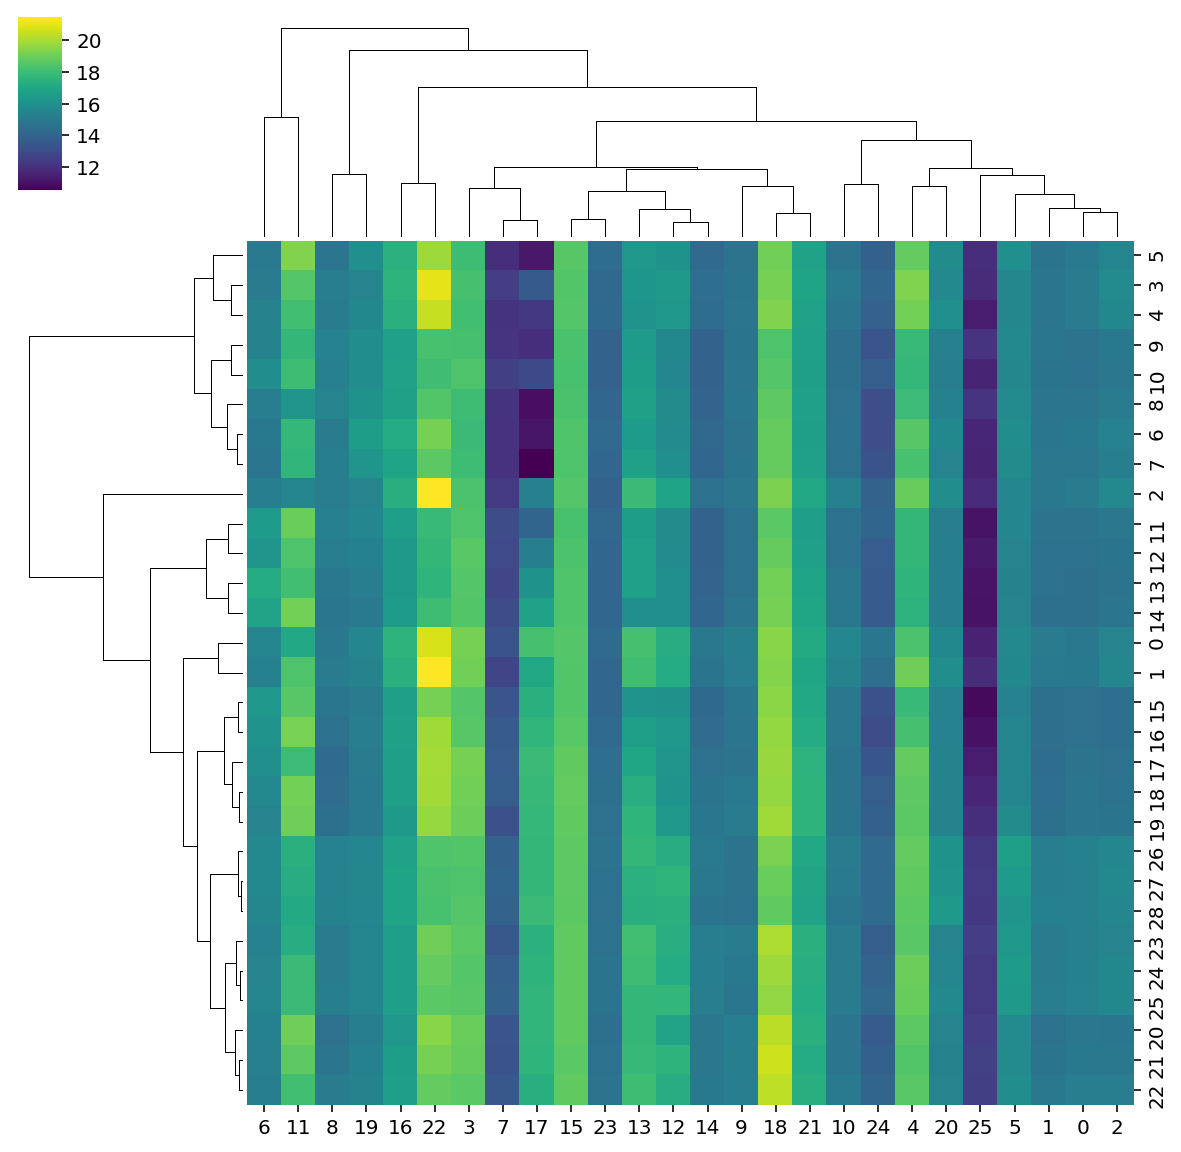

In [12]:
sns.clustermap(z, metric="correlation", cmap="viridis",)
plt.show()

### interactive plotly dendrogram heatmap

In [13]:
#import plotly.plotly as py
from plotly.graph_objs import *
import plotly.figure_factory as FF

import numpy as np
from scipy.spatial.distance import pdist, squareform


# get data
data = np.genfromtxt("http://files.figshare.com/2133304/ExpRawData_E_TABM_84_A_AFFY_44.tab",
                     names=True,usecols=tuple(range(1,30)),dtype=float, delimiter="\t")
data_array = data.view((np.float, len(data.dtype.names)))
data_array = data_array.transpose()
labels = data.dtype.names

# Initialize figure by creating upper dendrogram
figure = FF.create_dendrogram(data_array, orientation='bottom', labels=labels)
for i in range(len(figure['data'])):
    figure['data'][i]['yaxis'] = 'y2'

# Create Side Dendrogram
dendro_side = FF.create_dendrogram(data_array, orientation='right')
for i in range(len(dendro_side['data'])):
    dendro_side['data'][i]['xaxis'] = 'x2'

# Add Side Dendrogram Data to Figure
figure['data'].extend(dendro_side['data'])

# Create Heatmap
dendro_leaves = dendro_side['layout']['yaxis']['ticktext']
dendro_leaves = list(map(int, dendro_leaves))
data_dist = pdist(data_array)
heat_data = squareform(data_dist)

### correlation matrix just of the choosen dendro_leaves
heat_data = heat_data[dendro_leaves,:]
heat_data = heat_data[:,dendro_leaves]

heatmap = Data([
    Heatmap(
        x = dendro_leaves,
        y = dendro_leaves,
        z = heat_data,
        colorscale = 'YIGnBu'
    )
])

heatmap[0]['x'] = figure['layout']['xaxis']['tickvals']
heatmap[0]['y'] = dendro_side['layout']['yaxis']['tickvals']

# Add Heatmap Data to Figure
figure['data'].extend(Data(heatmap))

# Edit Layout
figure['layout'].update({'width':800, 'height':800,
                         'showlegend':False, 'hovermode': 'closest',
                         })
# Edit xaxis
figure['layout']['xaxis'].update({'domain': [.15, 1],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'ticks':""})
# Edit xaxis2
figure['layout'].update({'xaxis2': {'domain': [0, .15],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""}})

# Edit yaxis
figure['layout']['yaxis'].update({'domain': [0, .85],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'showticklabels': False,
                                  'ticks': ""})
# Edit yaxis2
figure['layout'].update({'yaxis2':{'domain':[.825, .975],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""}})

# Plot!
iplot(figure, filename='dendrogram_with_heatmap')


In [27]:
import matplotlib.pyplot as plt
import time
import random
 
ysample = random.sample(range(-50, 50), 100)
 
xdata = []
ydata = []
 
plt.show()
 
axes = plt.gca()
axes.set_xlim(0, 100)
axes.set_ylim(-50, +50)
#line, = axes.plot(xdata, ydata, 'r-')
 
for i in range(100):
    xdata.append(i)
    ydata.append(ysample[i])
    line.set_xdata(xdata)
    line.set_ydata(ydata)
    plt.draw()
    plt.pause(1e-17)
    time.sleep(0.1)
 
# add this if you don't want the window to disappear at the end
plt.show()

### Spearman Correlation

In [14]:
df = br29
#Die Spearman-Korrelation wird nicht zwischen den Datenpunkten selbst, sondern zwischen ihren Rängen berechnet. 
#-> monotoner Zusammenhang, nicht linearer Zusammenhang
correlation_matrix = df.corr(method='spearman')

/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.



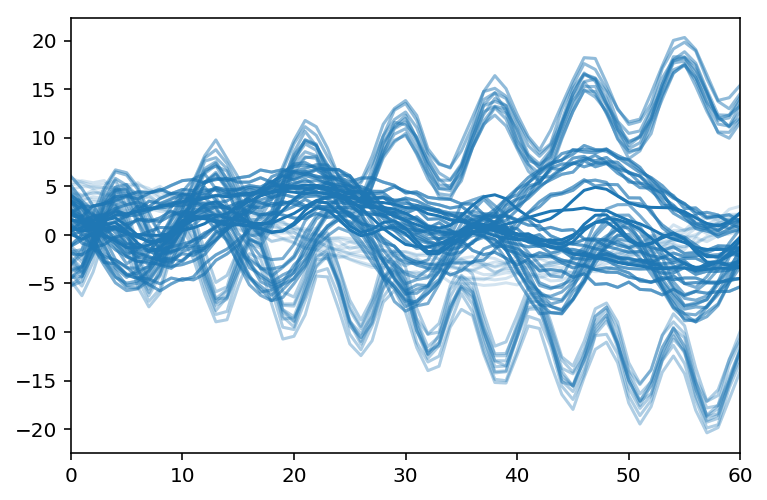

In [15]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt

#
# build 6 time series groups for testing, called: a, b, c, d, e, f
#

num_samples = 61
group_size = 10

#
# create the main time series for each group
#

x = np.linspace(0, 5, num_samples)
scale = 4

a = scale * np.sin(x)
b = scale * (np.cos(1+x*3) + np.linspace(0, 1, num_samples))
c = scale * (np.sin(2+x*6) + np.linspace(0, -1, num_samples))
d = scale * (np.cos(3+x*9) + np.linspace(0, 4, num_samples))
e = scale * (np.sin(4+x*12) + np.linspace(0, -4, num_samples))
f = scale * np.cos(x)

#
# from each main series build 'group_size' series
#

timeSeries = pd.DataFrame()
ax = None
for arr in [a,b,c,d,e,f]:
    arr = arr + np.random.rand(group_size, num_samples) + np.random.randn(group_size, 1)
    df = pd.DataFrame(arr)
    timeSeries = timeSeries.append(df)

    # We use seaborn to plot what we have
    #ax = sns.tsplot(ax=ax, data=df.values, ci=[68, 95])
    ax = sns.tsplot(ax=ax, data=timeSeries.values, err_style="unit_traces")

plt.show()

## Breathing rate plots of 29 day cycles

/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.



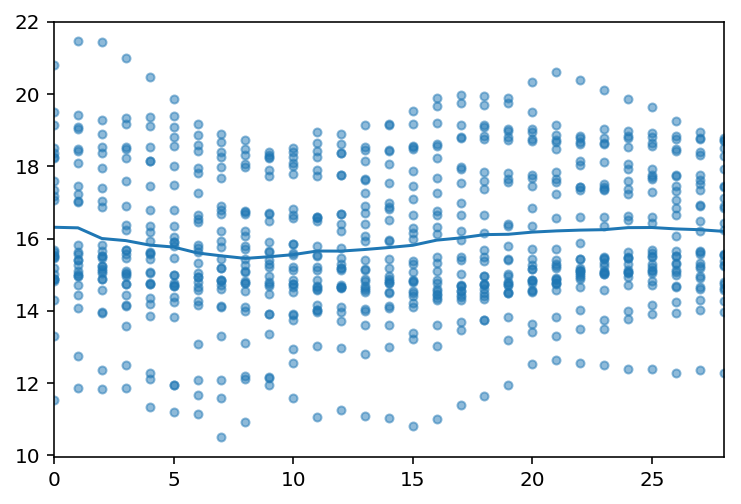

In [16]:
sns.tsplot(data=br29.drop("cycle_day", axis =1).T.values, err_style=["unit_points"])
plt.show()

In [17]:
br29.drop("cycle_day", axis =1).shape

(29, 26)

## Dendrogram of 29 Day cycles

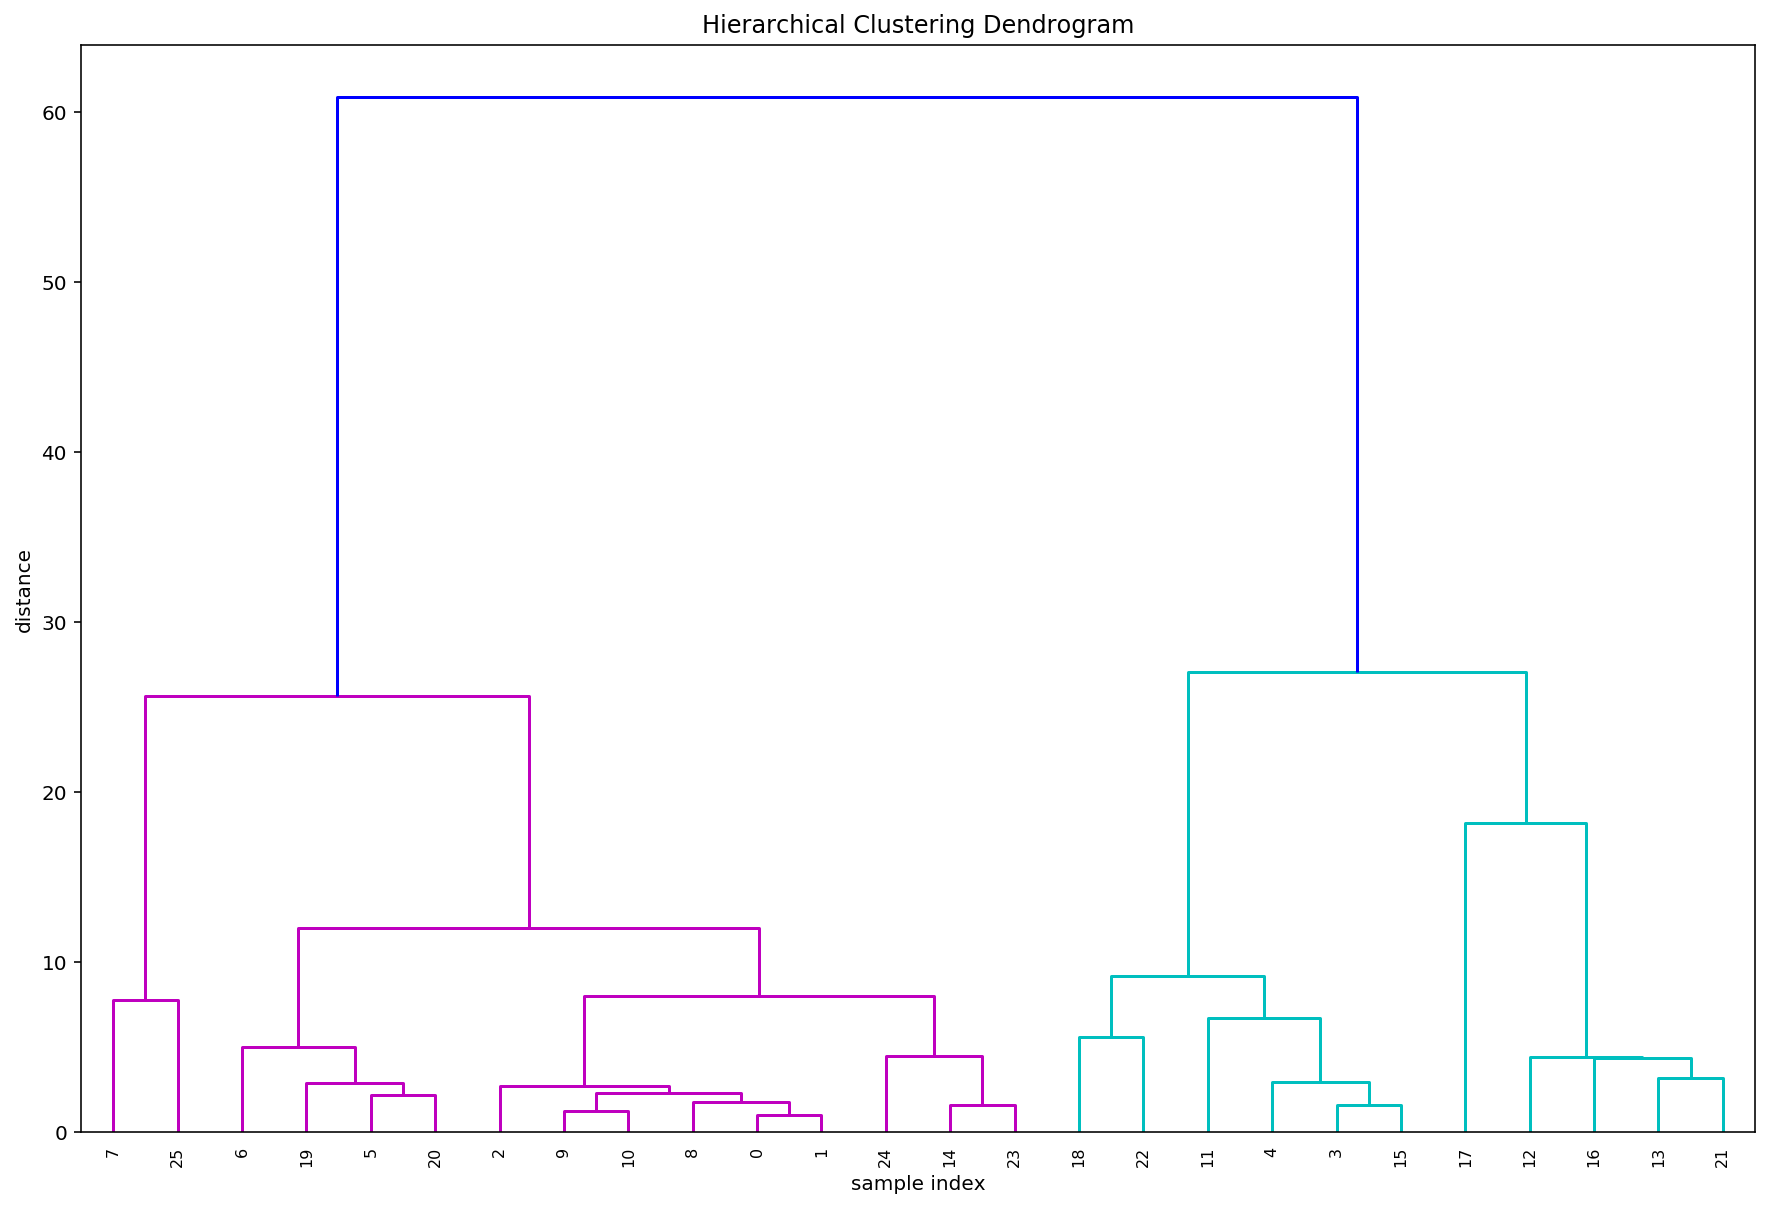

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 2],
       [0, 0, 0, 2],
       [0, 0, 2, 3],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 4],
       [1, 2, 3, 5],
       [1, 2, 3, 5],
       [0, 0, 0, 6],
       [1, 1, 1, 1],
       [1, 2, 3, 5],
       [1, 2, 3, 7],
       [1, 1, 1, 8],
       [0, 0, 0, 2],
       [0, 0, 0, 2],
       [1, 2, 3, 5],
       [1, 1, 1, 8],
       [0, 0, 0, 6],
       [0, 0, 0, 6],
       [0, 0, 2, 9]])

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, set_link_color_palette
# Do the clustering
Z = linkage(br29.drop("cycle_day", axis =1).T, method='ward', metric='euclidean')
set_link_color_palette(['m', 'c', 'y', 'k'])
# Plot dendogram
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,# font size for the x axis labels
)

plt.show()
cutree = cut_tree(Z, n_clusters=[2,3,4,10])
cutree

## custom distance

### Different distance calculation methods
#euclidean, maximum, manhattan, canberra, binary, minkowski, pearson, spearman, kendall

### different clustering methods
#ward.D, ward.D2, single, complete, average, mcquitty, median, centroid

### linkage calculation and dendrogram plot

In [19]:
# Do the clustering    
def clustering(timeSeries, method, metric, k, feature, cycle_length):
    Z = linkage(timeSeries.T,  method=method, metric=metric)
    with plt.style.context(('bmh')):
    # Plot dendogram
        set_link_color_palette(['m', 'c', 'y', 'k'])
        d = plt.figure(figsize=(15, 7))
        plt.title(str(feature+" "+str(cycle_length)+" Days "+str(method)+" "+str(metric)+" "+str(k)))
        plt.xlabel('cycle index')
        plt.ylabel('distance')
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
            show_contracted=True
        )
    return d

### k clusters

criterion:
 - inconsistent : If a cluster node and all its descendants have an inconsistent value less than or equal to t then all its leaf descendants belong to the same flat cluster. When no non-singleton cluster meets this criterion, every node is assigned to its own cluster. (Default)
 
 - distance : Forms flat clusters so that the originalobservations in each flat cluster have no greater a cophenetic distance than t.
 
 - maxclust : Finds a minimum threshold r so that the cophenetic distance between any two original observations in the same flat cluster is no more than r and no more than t flat clusters are formed.
 
 - monocrit : Forms a flat cluster from a cluster node c with index i when monocrit[j] <= t.
            For example, to threshold on the maximum mean distance as computed in the inconsistency matrix R with a threshold of 0.8 do:
        MR = maxRstat(Z, R, 3)
        cluster(Z, t=0.8, criterion='monocrit', monocrit=MR)
        
 - maxclust_monocrit : Forms a flat cluster from a non-singleton cluster node c when monocrit[i] <= r for all cluster indices i below and including c. r is minimized such that no more than t flat clusters are formed. monocrit must be monotonic. 
         For example, to minimize the threshold t on maximum inconsistency values so that no more than 3 flat clusters are formed, do:
        MI = maxinconsts(Z, R)
        cluster(Z, t=3, criterion='maxclust_monocrit', monocrit=MI)

In [32]:
def print_clusters(timeSeries, Z, k, plot=False):
    from scipy.cluster.hierarchy import fcluster
    import math
    import time
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='distance')

    # check the results
    s = pd.Series(results)
    clusters = s.unique()
    %matplotlib
    fig = plt.figure(figsize = (15,10))
    for i, c in enumerate(clusters):

        cluster_indeces = s[s==c].index

        if plot:
            with plt.style.context(('bmh')):
                
                x = math.ceil(k/2)
                fig.add_subplot(x,2,i+1)
                for cluster_index in range(len(cluster_indeces)):
                    plt.plot(timeSeries.T.iloc[:,cluster_indeces[cluster_index]], marker = ".",label = cluster_indeces[cluster_index])
                    plt.draw()
                    plt.pause(0.5)
                    ax.set_title("Cluster %d - number of entries %d" % (c, len(cluster_indeces)))
                    ax.legend(frameon=False, loc='lower right', ncol=2)

        else:
            print("Cluster %d - number of entries %d" % (c, len(cluster_indeces)))

In [33]:
def print_dendro_cluster(timeSeries, method, metric, k, feature, cycle_length,plot = True):
    %matplotlib inline
    #calculate linkage matrix
    Z = linkage(timeSeries.T, method=method, metric=metric)
    # plot dendrogram
    d_plot = clustering(timeSeries, method, metric, k, feature, cycle_length)
    # plot clustered time series
    c_plot = print_clusters(timeSeries.T, Z, k, plot=plot)
    #save figures in one pdf file
    pdf_name = str(feature)+"_"+str(cycle_length)+"_"+str(method)+"_"+str(metric)+"_"+str(k)+".pdf"
    import matplotlib.backends.backend_pdf
    pp = matplotlib.backends.backend_pdf.PdfPages(pdf_name)
    pp.savefig(d_plot, dpi = 300)
    pp.savefig(c_plot, dpi = 300)
    pp.close()

In [34]:
# If you want your own metric: Here we use spearman correlation
def my_metric(x, y):
    r = stats.pearsonr(x, y)[0]
    return 1 - r # correlation to distance: range 0 to 2

In [35]:
timeSeries = br29_norm.drop("cycle_day", axis =1)
feature = "Breathing Rate (z-score)"
cycle_length = "29"
print_dendro_cluster(timeSeries,"average","euclidean", 6, feature, cycle_length)

Using matplotlib backend: MacOSX


In [527]:
feature = "Breathing Rate (z-score)"
cycle_length = "29"
timeSeries = br29_norm.drop("cycle_day", axis =1)
#### metric
#euclidean,  manhattan, canberra, minkowski, cityblock, seuclidean, cosine, correlation, kulsinski, dice, matching, yule
#hamming,jaccard, chebyshev,braycurtis, mahalanobis,sokalsneath', sokalmichener, russellrao, rogerstanimoto
# not working: maximum,binary, pearson, spearman, kendall
#### method
#ward, single, complete, average, median, centroid
### not working: mcquitty
k = 4
methods = ["average", "ward", "single", "complete", "median", "centroid"]
metrics = ["euclidean",  "manhattan", "canberra", "minkowski", "cityblock", "seuclidean", "cosine", "correlation", \
          "kulsinski", "dice", "matching", "yule", "hamming","jaccard", "chebyshev","braycurtis", "mahalanobis",\
          "sokalsneath", "sokalmichener", "russellrao", "rogerstanimoto"]

for method in methods:
    for metric in metrics:
        try:
             print_dendro_cluster(timeSeries, method,metric, k, feature, cycle_length)
        except:
            print("Clustering with method {} and metric {} is not possible.".format(method, metric))

#print_dendro_cluster(timeSeries, method,"cityblock", 4, plot = True)
#print_dendro_cluster(timeSeries, method,"seuclidean", 4, plot = True)
#print_dendro_cluster(timeSeries, method,"cosine", 4, plot = True)

#print_dendro_cluster(timeSeries, method,"correlation", 4, plot = True)
#print_dendro_cluster(timeSeries, method,"kulsinksi", 4, plot = True)
#print_dendro_cluster(timeSeries, method,"dice", 4, plot = True)
#print_dendro_cluster(timeSeries, method,"matching", 4, plot = True)
#print_dendro_cluster(timeSeries, method,"yule", 4, plot = True)

Clustering with method average and metric manhattan is not possible.


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning:

Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0.0



Clustering with method average and metric yule is not possible.
Clustering with method average and metric mahalanobis is not possible.
Clustering with method ward and metric manhattan is not possible.
Clustering with method ward and metric canberra is not possible.
Clustering with method ward and metric minkowski is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric seuclidean is not possible.
Clustering with method ward and metric cosine is not possible.
Clustering with method ward and metric correlation is not possible.
Clustering with method ward and metric kulsinski is not possible.
Clustering with method ward and metric dice is not possible.
Clustering with method ward and metric matching is not possible.
Clustering with method ward and metric yule is not possible.
Clustering with method ward and metric hamming is not possible.
Clustering with method ward and metric jaccard is not possible.
Clustering with method 

Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.


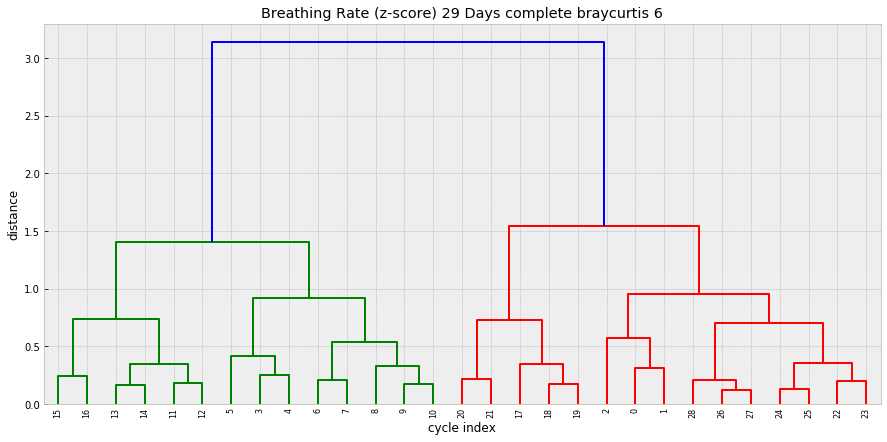

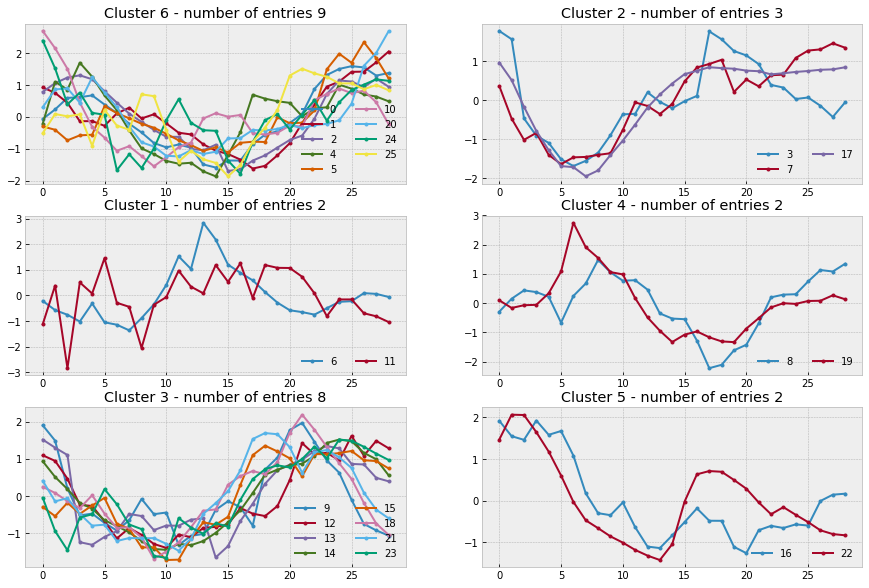

In [528]:
feature = "Breathing Rate (z-score)"
cycle_length = "29"
timeSeries = br29_norm.drop("cycle_day", axis =1)
number_clusters = [2,3,4,5,6]
methods = ["average", "ward", "complete"]
metrics = ["euclidean", "cityblock", "braycurtis"]

for method in methods:
    for metric in metrics:
        for k in number_clusters:
            try:
                 print_dendro_cluster(timeSeries, method,metric, k, feature, cycle_length)
            except:
                print("Clustering with method {} and metric {} is not possible.".format(method, metric))

Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.


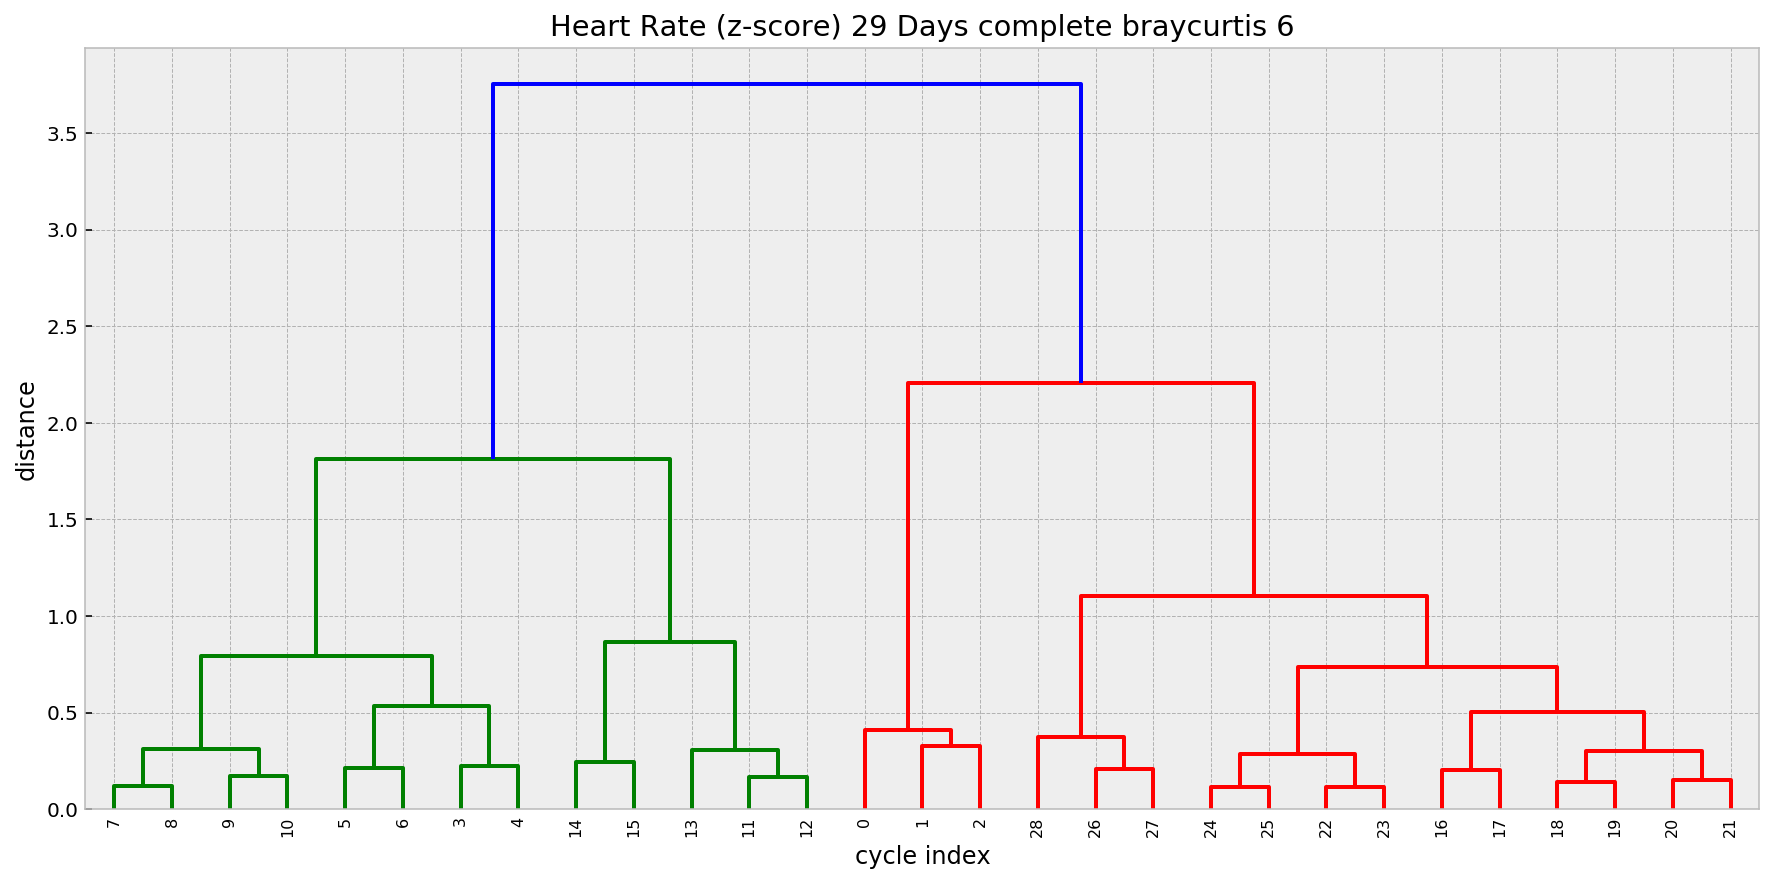

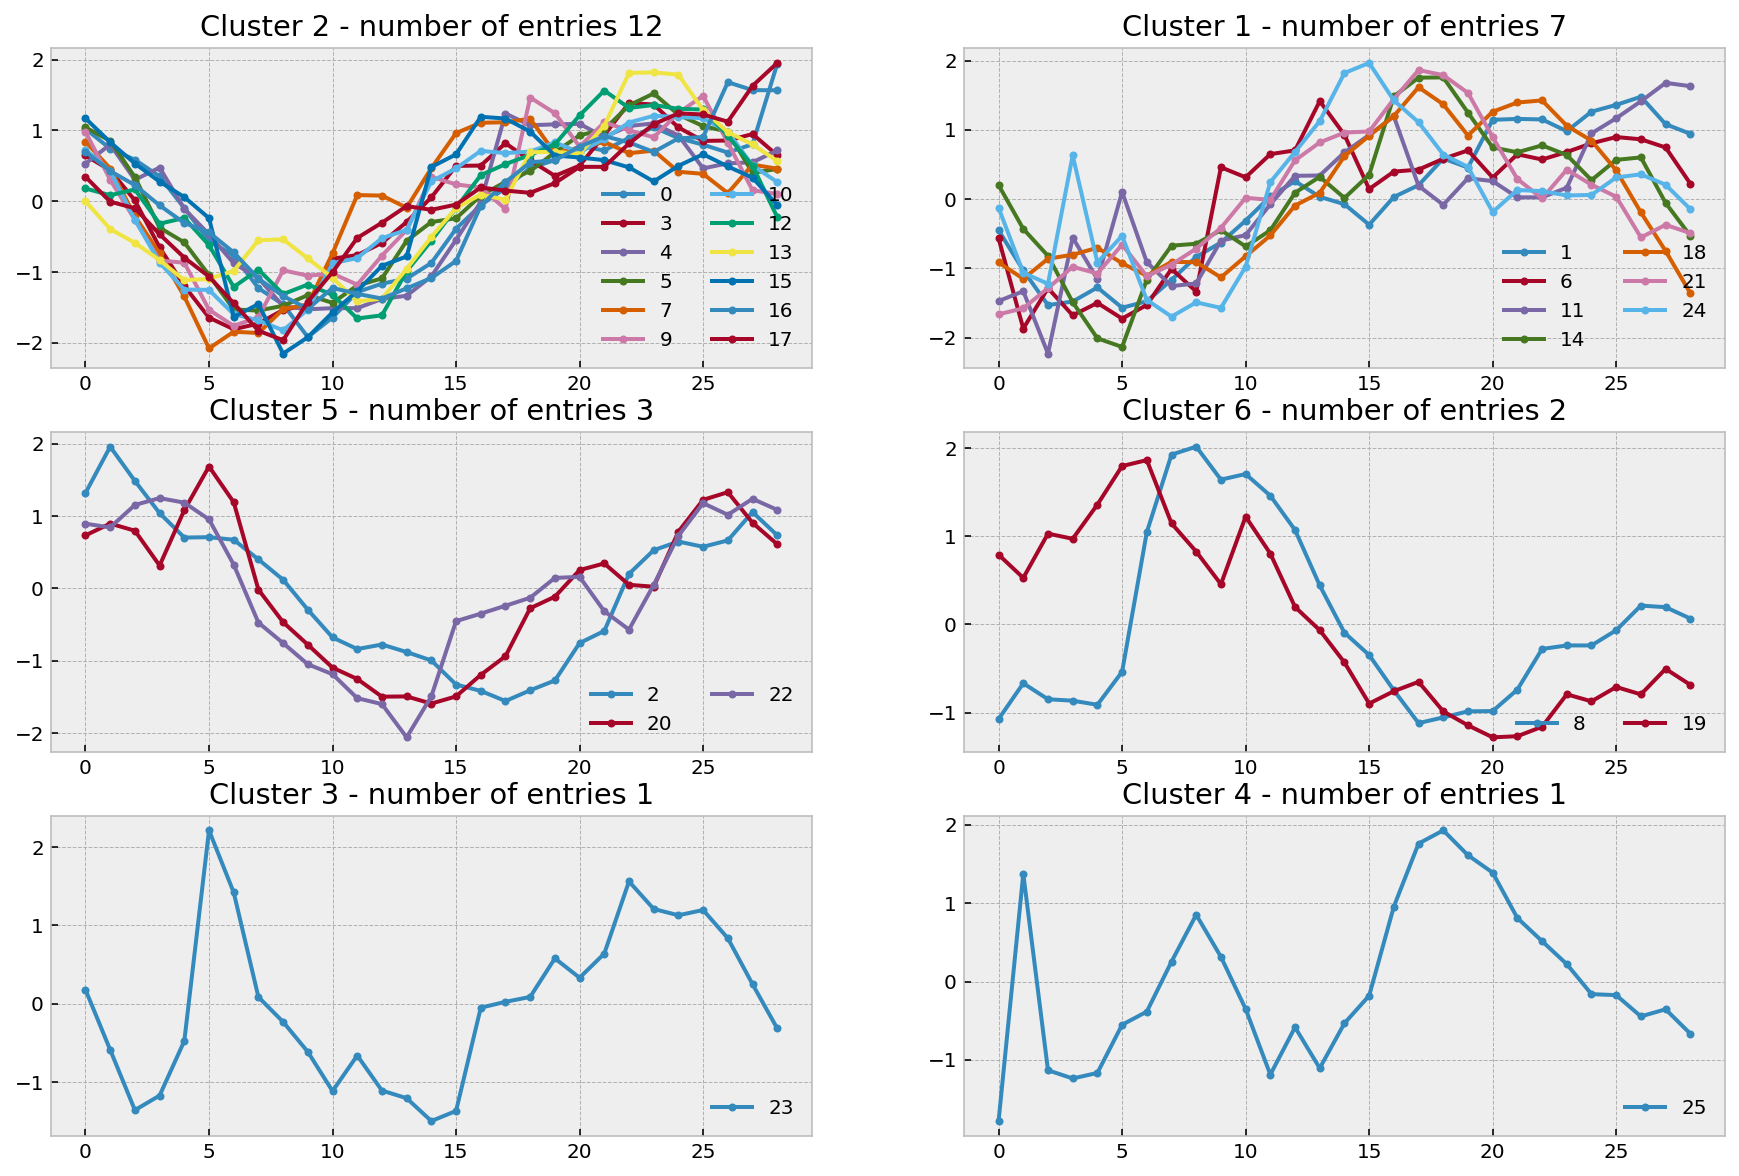

In [533]:
feature = "Heart Rate (z-score)"
cycle_length = "29"
timeSeries = hr29_norm.drop("cycle_day", axis =1)
number_clusters = [2,3,4,5,6]
methods = ["average", "ward", "complete"]
metrics = ["euclidean", "cityblock", "braycurtis"]

for method in methods:
    for metric in metrics:
        for k in number_clusters:
            try:
                 print_dendro_cluster(timeSeries, method,metric, k, feature, cycle_length)
            except:
                print("Clustering with method {} and metric {} is not possible.".format(method, metric))

Clustering with method average and metric braycurtis is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method complete and metric braycurtis is not possible.


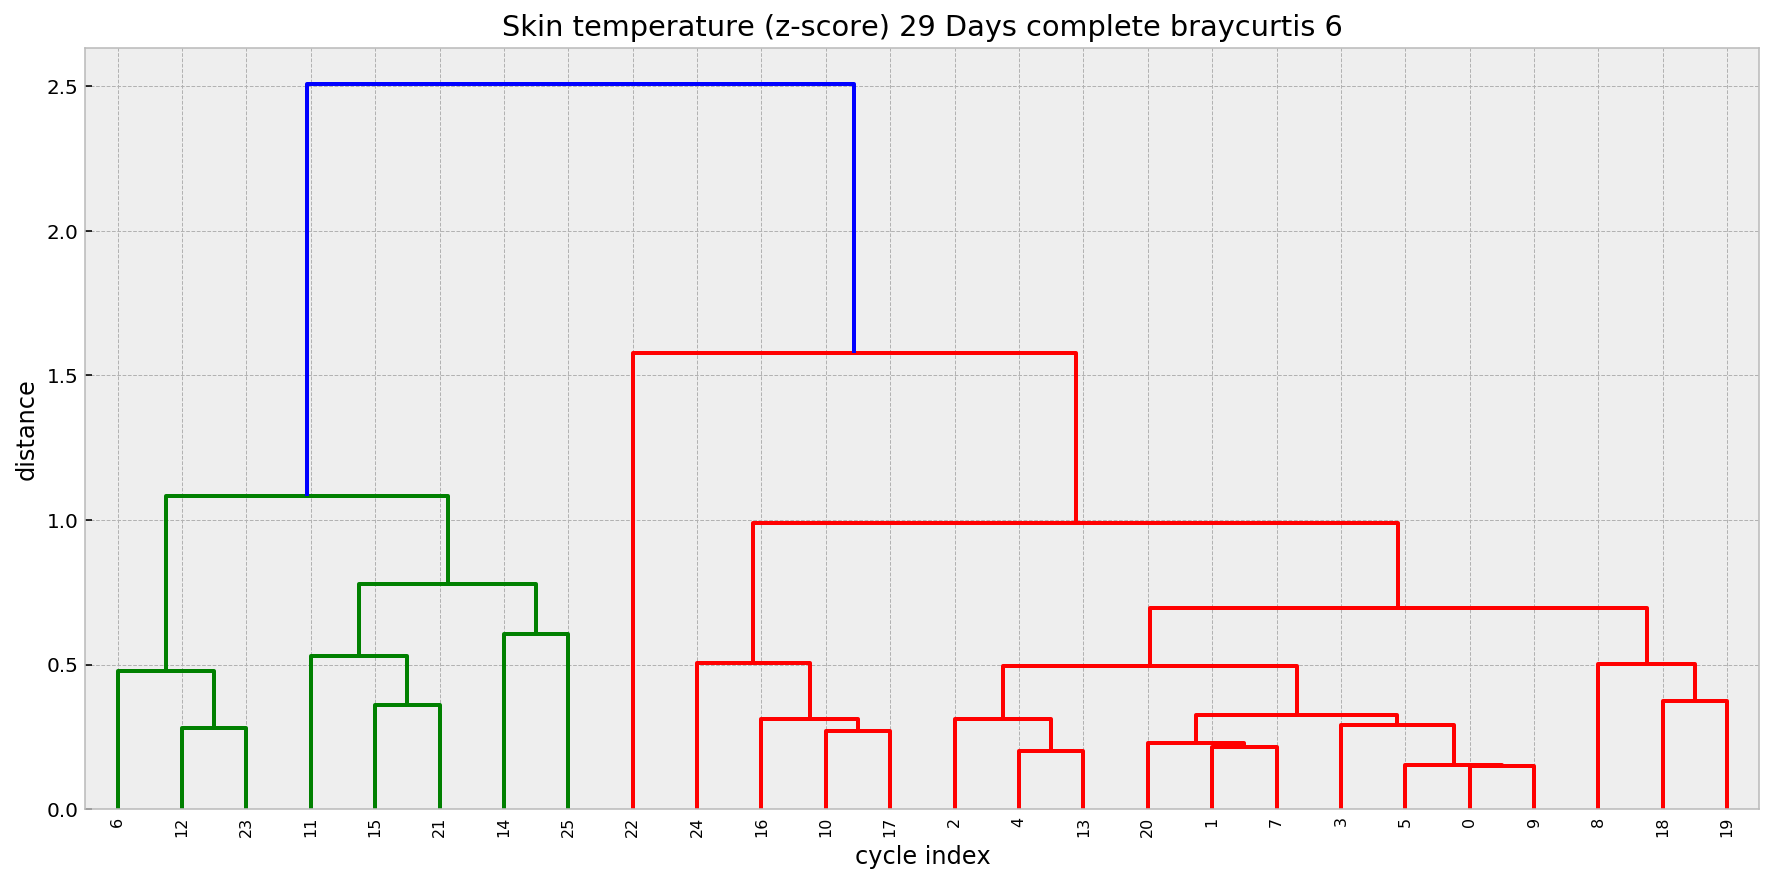

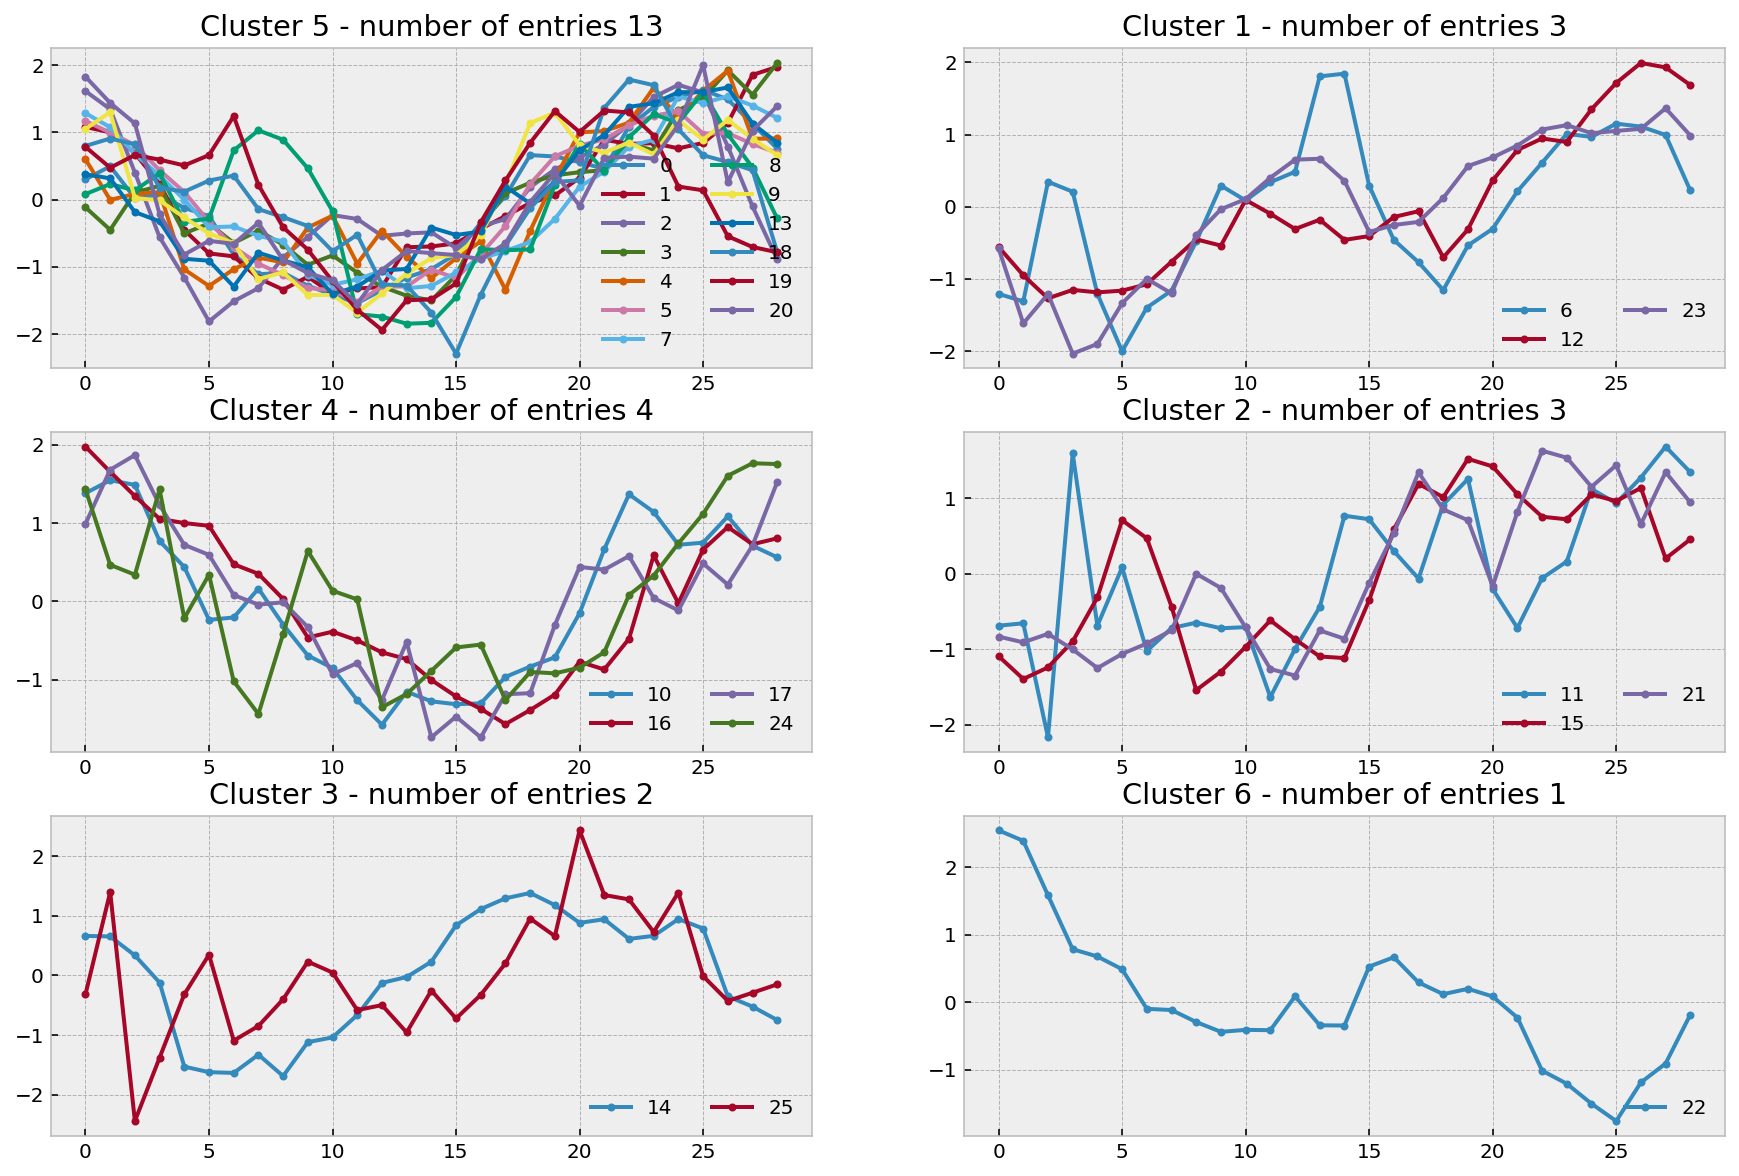

In [571]:
feature = "Skin temperature (z-score)"
cycle_length = "29"
timeSeries = st29_norm.drop("cycle_day", axis =1)
number_clusters = [2,3,4,5,6]
methods = ["average", "ward", "complete"]
metrics = ["euclidean", "cityblock", "braycurtis"]

for method in methods:
    for metric in metrics:
        for k in number_clusters:
            try:
                 print_dendro_cluster(timeSeries, method,metric, k, feature, cycle_length)
            except:
                print("Clustering with method {} and metric {} is not possible.".format(method, metric))

In [542]:
def emd_metric(x, y):
    from scipy.stats import wasserstein_distance
    d = wasserstein_distance(x,y)
    return d # correlation to distance: range 0 to 2

In [541]:
# earth movers distance


ts1 = st29_norm.drop("cycle_day", axis =1)["3"]
ts2 = st29_norm.drop("cycle_day", axis =1)["17"]
wasserstein_distance(ts1, ts2)

0.18668966765565176

Clustering with method ward and metric <function emd_metric at 0x111a71f28> is not possible.
Clustering with method ward and metric <function emd_metric at 0x111a71f28> is not possible.
Clustering with method ward and metric <function emd_metric at 0x111a71f28> is not possible.
Clustering with method ward and metric <function emd_metric at 0x111a71f28> is not possible.
Clustering with method ward and metric <function emd_metric at 0x111a71f28> is not possible.
Clustering with method complete and metric <function emd_metric at 0x111a71f28> is not possible.


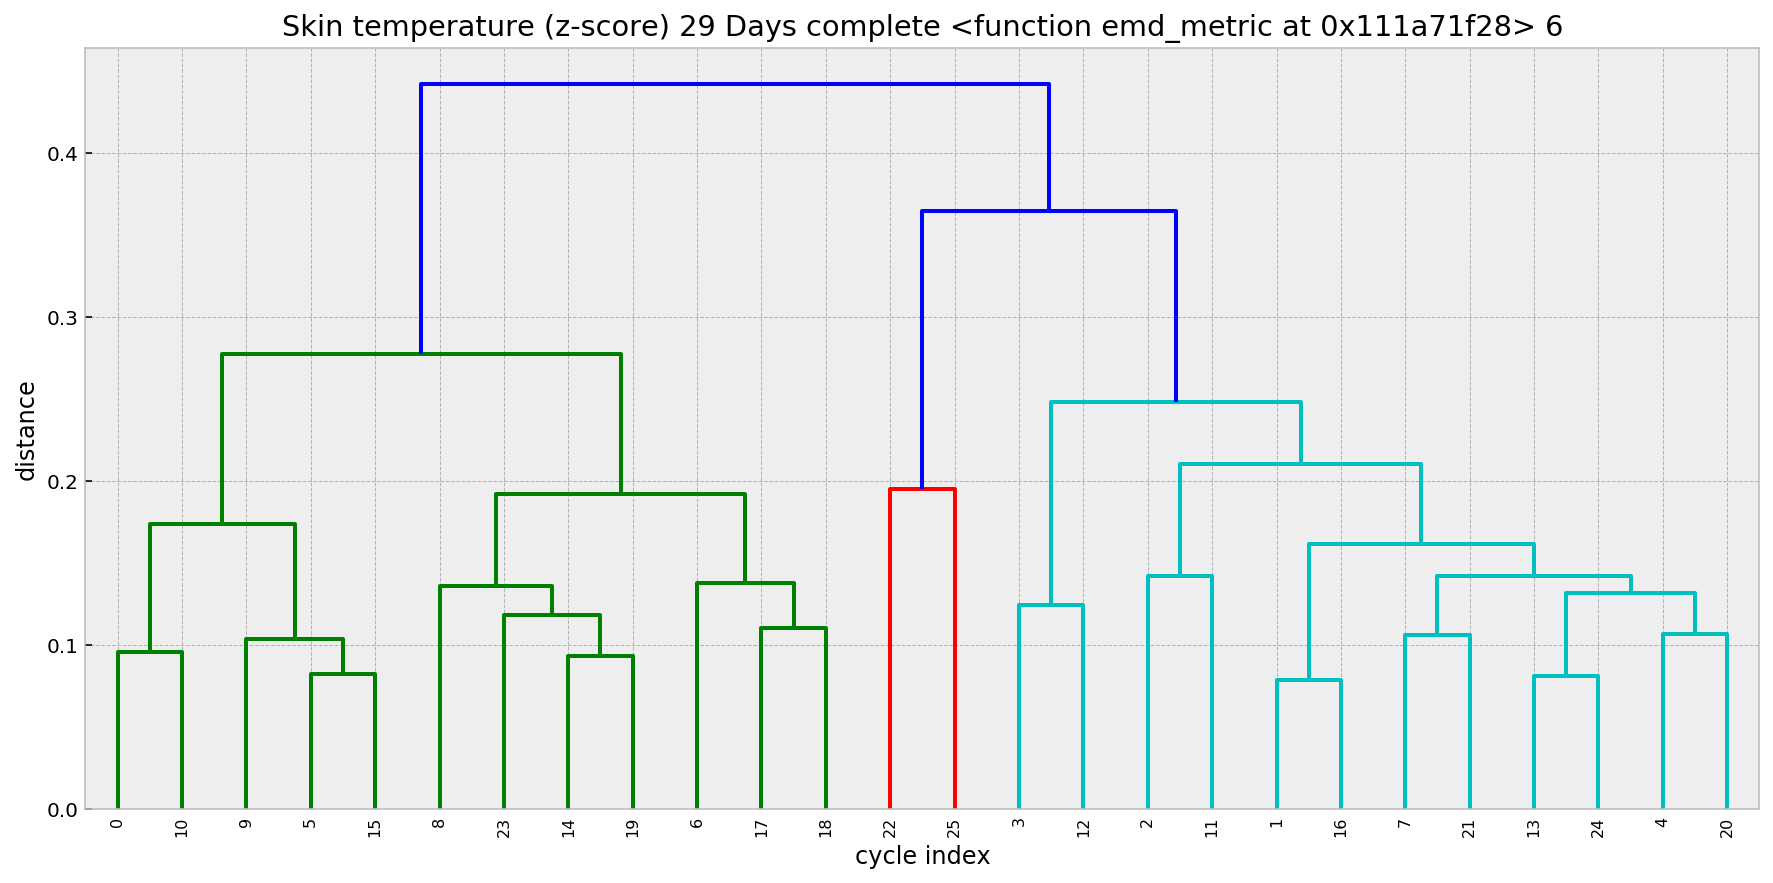

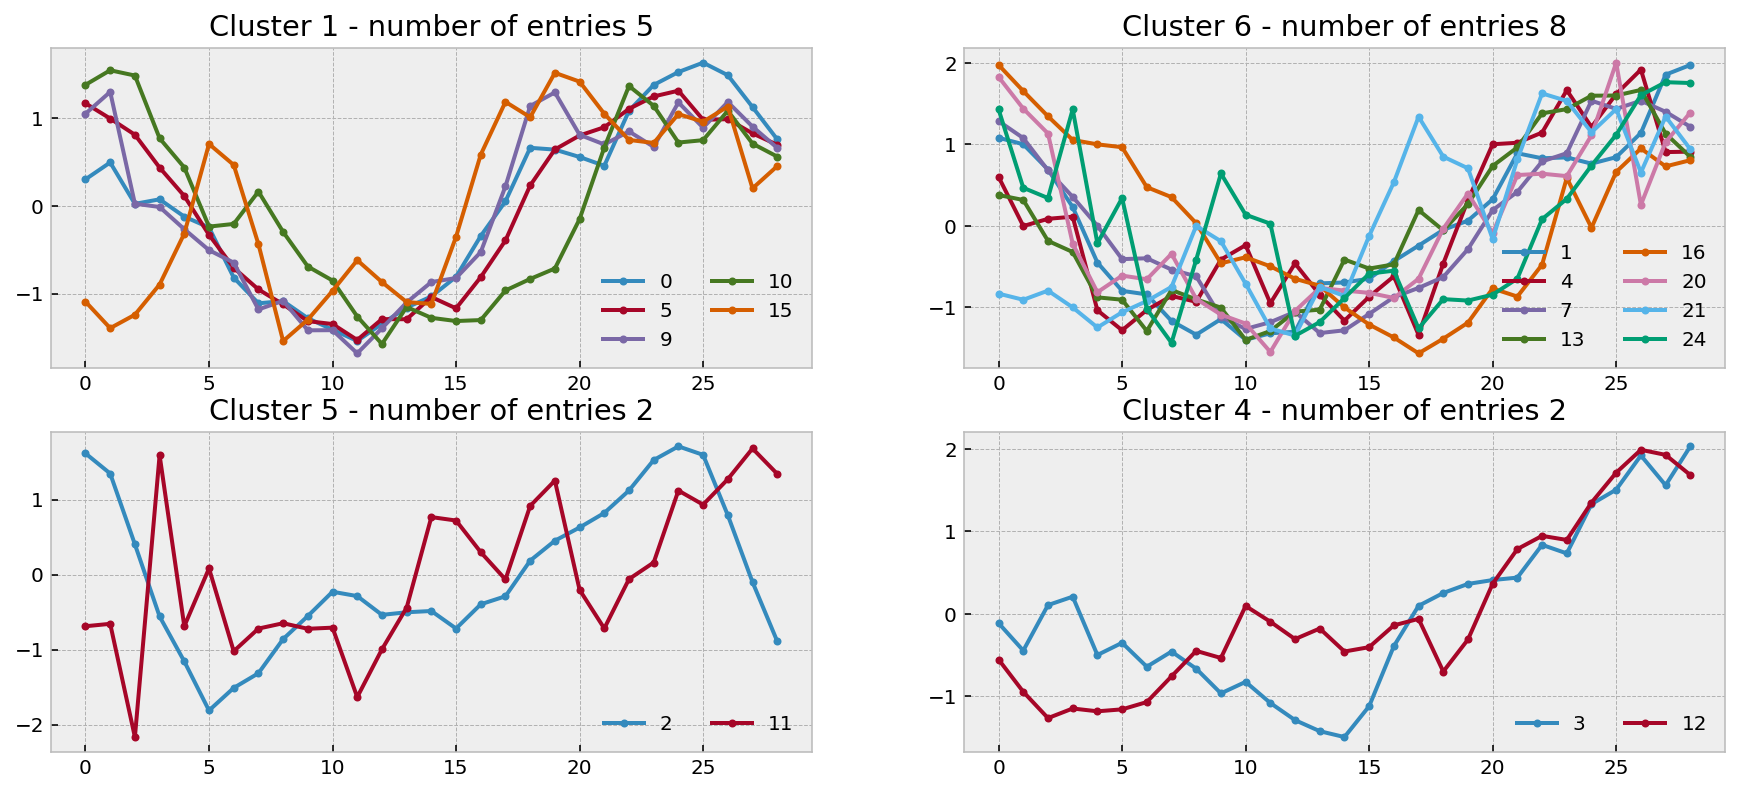

In [572]:
feature = "Skin temperature (z-score)"
cycle_length = "29"
timeSeries = st29_norm.drop("cycle_day", axis =1)
number_clusters = [2,3,4,5,6]
methods = ["average", "ward", "complete"]
metric = emd_metric

for method in methods:
        for k in number_clusters:
            try:
                 print_dendro_cluster(timeSeries, method,metric, k, feature, cycle_length)
            except:
                print("Clustering with method {} and metric {} is not possible.".format(method, metric))

# Heart Rate cycles of all regular lengths 

In [580]:
hr_na = pd.read_csv("Data/hr_na.csv")
hr = pd.read_csv("Data/hr_all_norm.csv")


Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric <function emd_metric at 0x111a71f28> is not possible.
Clustering with method ward and metric <function emd_metric at 0x111a71f28> is not possible.
Clustering with method ward and metric <function emd_metric at 0x111a71f28> is not possible.
Clustering with method ward and metric <function emd_metric at 0x111a71f28> is not possible.


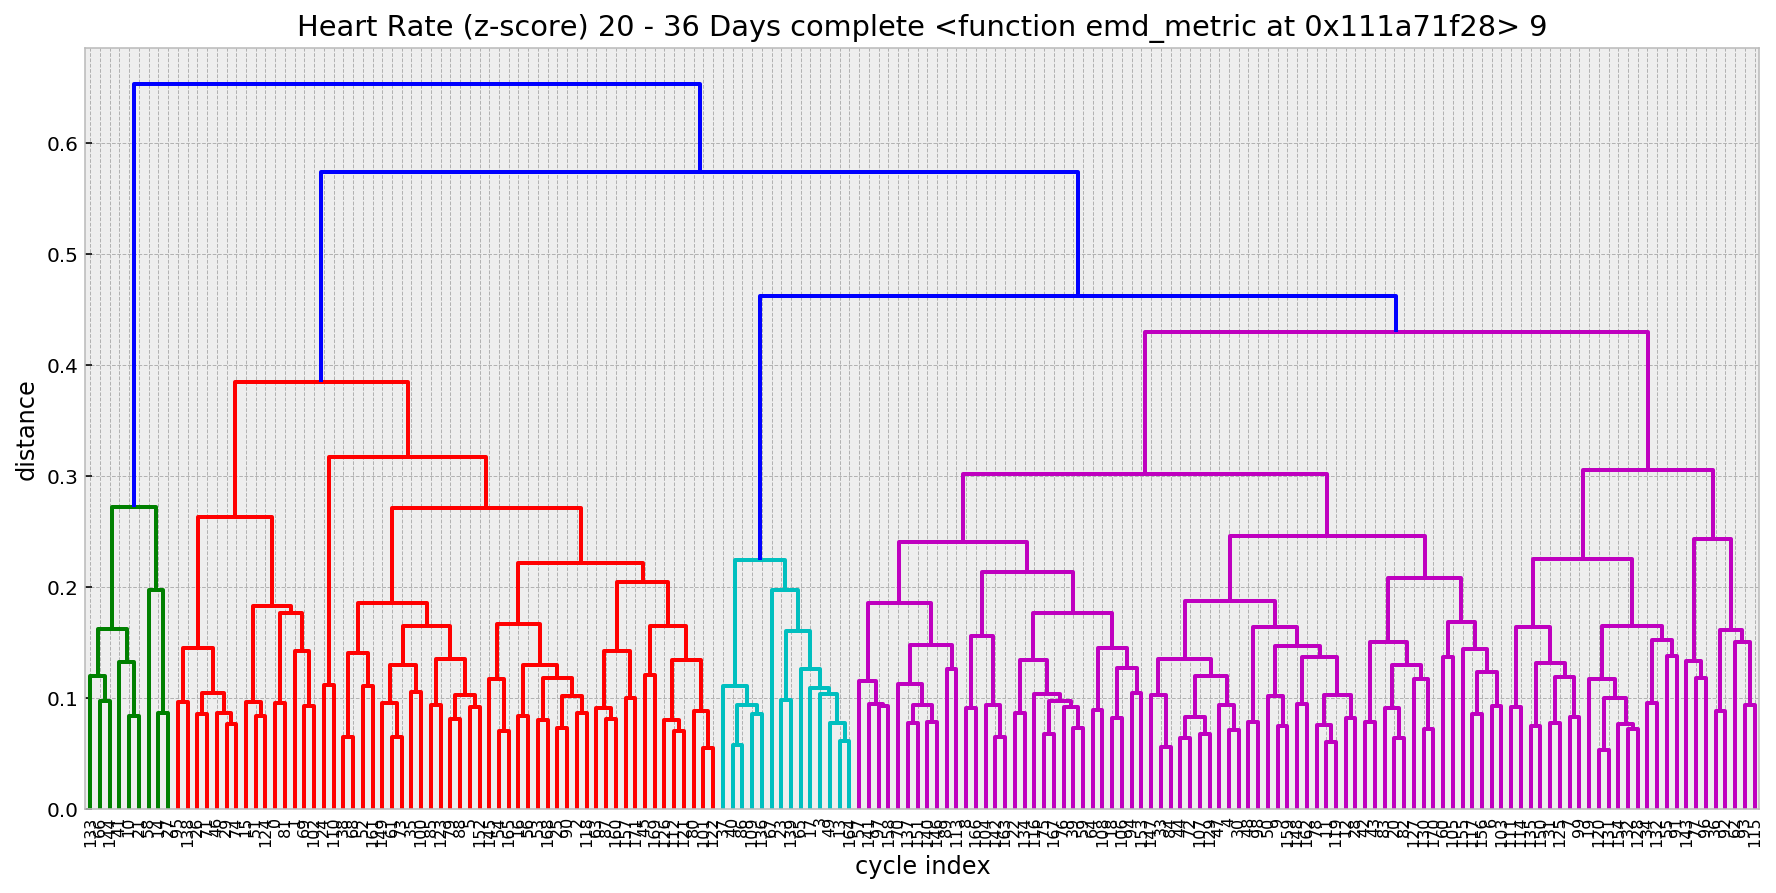

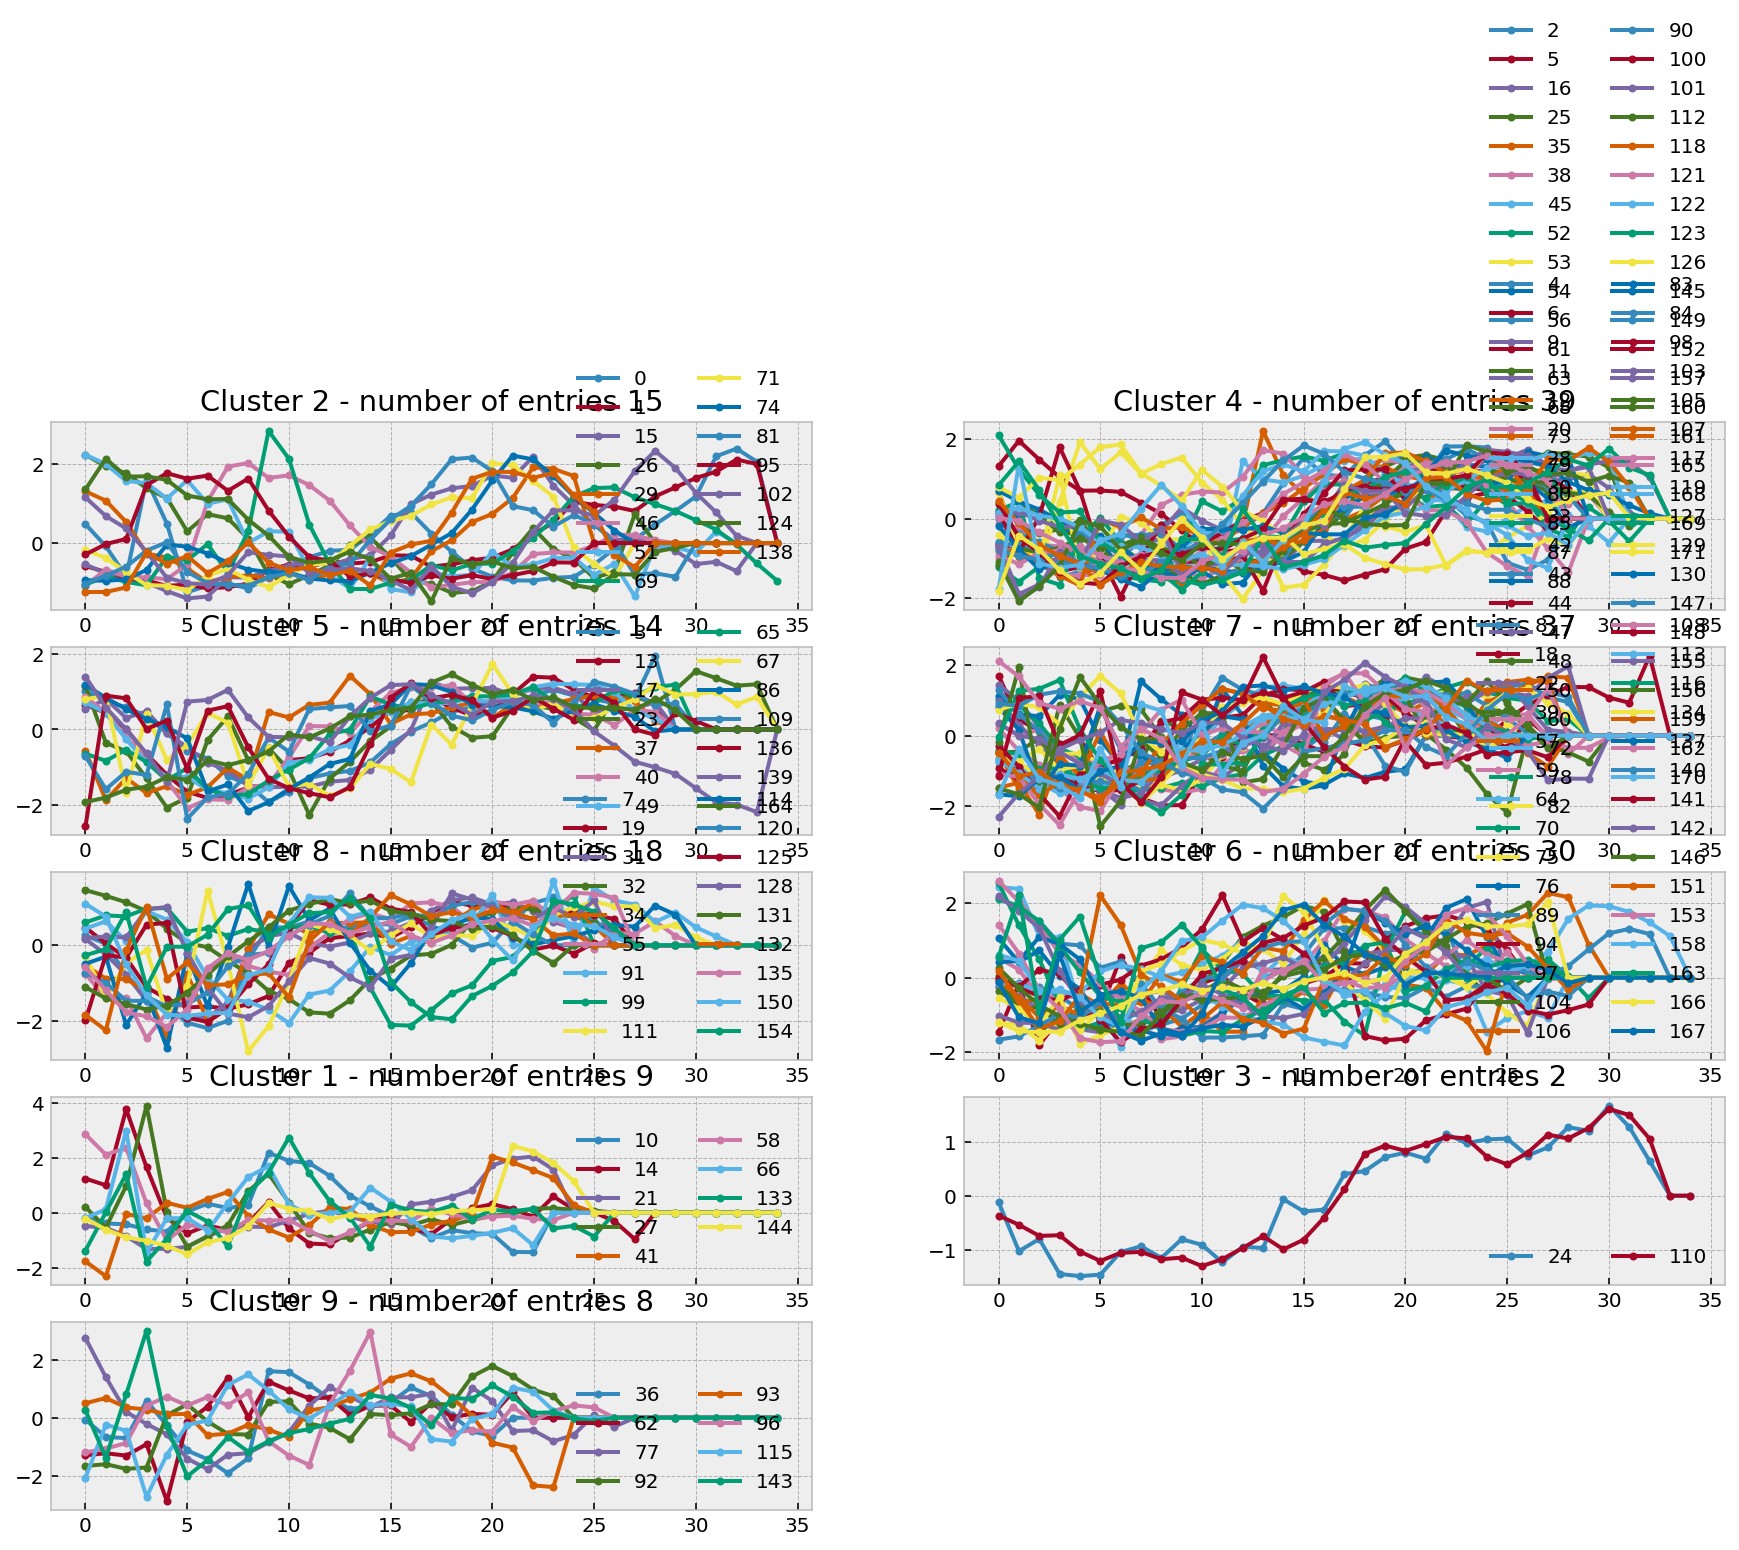

In [576]:
feature = "Heart Rate (z-score)"
cycle_length = "20 - 36"
timeSeries = hr.drop("cycle_day", axis =1)
number_clusters = [4,5,6,9]
methods = ["average", "ward", "complete"]
metrics = ["euclidean", "cityblock", "braycurtis", emd_metric]

for method in methods:
    for metric in metrics:
        for k in number_clusters:
            try:
                 print_dendro_cluster(timeSeries, method,metric, k, feature, cycle_length)
            except:
                print("Clustering with method {} and metric {} is not possible.".format(method, metric))